### 종목코드는 거래소 API로 받기 

- https://jaeseongpark.tistory.com/138
- https://github.com/FinanceData/FinanceDataReader

In [5]:
#!pip install finance-datareader

import FinanceDataReader as fdr
from pykrx import stock

import pandas as pd

2.1.1 종목의 기초 정보 수집하기

In [17]:
#stocks = fdr.StockListing('KOSPI') # KOSPI: 940 종목
#stocks = fdr.StockListing('KOSDAQ') # KOSDAQ: 1,597 종목

In [6]:
stock.get_market_ticker_list('20250102', market='KOSPI')

[]

### 주가, 거래량

In [8]:
df = fdr.DataReader('005930') # 삼성전자 전체 (1999년 ~ 현재)
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-12-24,112400,112400,110900,111100,12492939,-0.003587
2025-12-26,112400,117000,112400,117000,34018174,0.053105
2025-12-29,119400,119700,118200,119500,19676004,0.021368
2025-12-30,119100,121200,118700,119900,19746349,0.003347
2026-01-02,120200,128500,120200,128500,29435352,0.071726


In [9]:
stock.get_market_ohlcv('20250416', '20250418', '005930') # 삼성전자
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-12-24,112400,112400,110900,111100,12492939,-0.003587
2025-12-26,112400,117000,112400,117000,34018174,0.053105
2025-12-29,119400,119700,118200,119500,19676004,0.021368
2025-12-30,119100,121200,118700,119900,19746349,0.003347
2026-01-02,120200,128500,120200,128500,29435352,0.071726


### 밸류 : PER, PBR 

In [43]:
fdr.SnapDataReader('NAVER/FINSTATE-2Y/005930').columns

Index(['매출액', '영업이익', '세전계속사업이익', '당기순이익', '자산총계', '부채총계', '자본총계', '자본금',
       '영업활동현금흐름', '투자활동현금흐름', '재무활동현금흐름', '영업이익률', '순이익률', 'ROE(%)', 'ROA(%)',
       '부채비율', '유보율', 'EPS(원)', 'PER(배)', 'BPS(원)', 'PBR(배)', '현금DPS(원)',
       '현금배당수익률', '현금배당성향(%)', '발행주식수(보통주)'],
      dtype='object', name='주요재무정보')

In [14]:
cols = ['PER(배)', 'PBR(배)']
fs = fdr.SnapDataReader('NAVER/FINSTATE-2Y/005930') # 연간 K-IFRS 연결
fs[cols]

주요재무정보,PER(배),PBR(배)
날짜,,
2020-12-01,20.83,1.99
2021-12-01,13.33,1.74
2022-12-01,6.75,1.06
2023-12-01,34.43,1.47
2024-12-01,10.49,0.89
2025-12-01,22.44,2.03
2026-12-01,11.19,1.75
2027-12-01,10.62,1.50


In [11]:
# 특정일 기준 PER과 PBR 산출 
# df = stock.get_market_fundamental('20250418', market='ALL') 
# : 오류 뜸 

퀄러티 : FinaceDataReader만 체크 

In [50]:
cols = ['매출액', '영업이익', '당기순이익', '영업이익률', '순이익률', 'ROE(%)'] 

fs = fdr.SnapDataReader('NAVER/FINSTATE-2Y/005930') # 연간 K-IFRS 연결
fs[cols]

주요재무정보,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(%)
날짜,,,,,,
2020-12-01,2368070.0,359939.0,264078.0,15.20,11.15,9.80
2021-12-01,2796048.0,516339.0,399074.0,18.47,14.27,13.74
2022-12-01,3022314.0,433766.0,556541.0,14.35,18.41,16.87
2023-12-01,2589355.0,65670.0,154871.0,2.54,5.98,4.31
2024-12-01,3008709.0,327260.0,344514.0,10.88,11.45,9.00
2025-12-01,3288209.0,NaN,395991.0,12.14,12.04,9.53
2026-12-01,3996103.0,NaN,792574.0,22.72,19.83,17.05
2027-12-01,4289716.0,NaN,827821.0,22.00,19.30,15.43


In [16]:
cols = ['매출액', '영업이익', '당기순이익', '영업이익률', '순이익률', 'ROE(%)'] 

fs = fdr.SnapDataReader('NAVER/FINSTATE-2Q/005930') # 분기 K-IFRS 연결
fs[cols]

주요재무정보,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(%)
날짜,,,,,,
2024-09-01,790987.0,91834.0,101009.0,11.61,12.77,8.81
2024-12-01,757883.0,64927.0,77544.0,8.57,10.23,9.00
2025-03-01,791405.0,66853.0,82229.0,8.45,10.39,9.23
2025-06-01,745663.0,46761.0,51164.0,6.27,6.86,7.97
2025-09-01,860617.0,121661.0,122257.0,14.14,14.21,8.33
2025-12-01,892173.0,NaN,151677.0,18.44,17.00,NaN
2026-03-01,966848.0,NaN,196477.0,21.01,20.32,NaN
2026-06-01,971968.0,NaN,214950.0,23.76,22.12,NaN


---
### 코스피 시총 상위 종목 샘플로 교재 작성해보기

- 깃헙에 종목코드 텍스트 올리기 : 전체종목, 코스피200(또는 시총200) 

In [27]:
# 1안 : 샘플 35종목
import pandas as pd

url = 'https://raw.githubusercontent.com/YoonHanho/ShowMeTheMoney_PY/main/kospi_top200.txt'

# read_csv로 URL 직접 읽기 (sep='\s+'는 공백 구분, dtype=str은 '00...' 유지)
df = pd.read_csv(url, sep='\s+', header=None, names=['종목코드', '종목명'], dtype=str)
df.tail(3)

,종목코드,종목명
32,009830,한화솔루션
33,036570,엔씨소프트
34,259960,크래프톤


In [28]:
# 2안
import requests

url = 'https://raw.githubusercontent.com/YoonHanho/ShowMeTheMoney_PY/main/kospi_top200.txt'
response = requests.get(url)

data = [line.split(maxsplit=1) for line in response.text.strip().split('\n')]
df = pd.DataFrame(data, columns=['종목코드', '종목명'])

df.tail()

,종목코드,종목명
30,316140,우리금융지주
31,010950,S-Oil
32,009830,한화솔루션
33,036570,엔씨소프트
34,259960,크래프톤


---
### 2.1.2 모멘텀 지표 

In [36]:
df = fdr.DataReader('005930', '20250416', '20250418') # 삼성전자 전체 (1999년 ~ 현재)
#print(df.to_html())
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-04-16,56000,56200,54500,54700,14437025,-0.033569
2025-04-17,54700,55300,54500,55100,10867069,0.007313
2025-04-18,55300,55600,54900,55300,5848342,0.003630


In [37]:
df = fdr.DataReader('005930', '20240418', '20250418') # 삼성전자 전체 (1999년 ~ 현재)
mom_1d = ( df.iloc[-1]['Close'] / df.iloc[-2]['Close'] - 1 )  * 100    # 전일
mom_1w = ( df.iloc[-1]['Close'] / df.iloc[-5]['Close'] - 1 )  * 100   # 주간
mom_1m = ( df.iloc[-1]['Close'] / df.iloc[-20]['Close'] - 1 )  * 100  # 월간 
mom_1y = ( df.iloc[-1]['Close'] / df.iloc[-240]['Close'] - 1 )  * 100  # 연간

In [39]:
print(mom_1d)  # 전일
print(mom_1w)  # 전주
print(mom_1m)  # 전월 
print(mom_1y)  # 전년

0.3629764065335772
-1.6014234875444844
-8.595041322314046
-26.75496688741722


<Axes: xlabel='Date'>

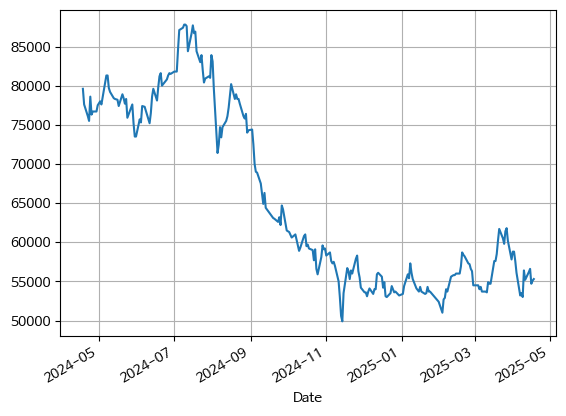

In [40]:
df['Close'].plot(kind='line', grid=True)

In [41]:
df['Volume'].rolling(window=5).mean()  # 5일 이동평균 계산 

Date
2024-04-18           NaN
2024-04-19           NaN
2024-04-22           NaN
2024-04-23           NaN
2024-04-24    24808215.8
                 ...    
2025-04-14    19168214.0
2025-04-15    15861373.0
2025-04-16    14633386.0
2025-04-17    12217165.4
2025-04-18    10600737.8
Name: Volume, Length: 243, dtype: float64

In [42]:
vol_short = df['Volume'].rolling(window=5).mean().iloc[-1] # 거래량 5일이동평균의 마지막 데이터
vol_long = df['Volume'].rolling(window=20).mean().iloc[-1] # 거래량20일이동평균의 마지막 데이터
vol = ( vol_short / vol_long - 1) * 100 # 거래량 변동성 계산 

vol

-37.89028795307283

---
### 2.1.3 밸류 데이터 수집하기

- 1개 종목 추출 방법 : 영업이익 결측 제외. 연간 K-IRRS 기준
- 특이사항 : 카카오뱅크(323410) 데이터 거의 다 결측

In [104]:
# 재무제표 데이터 추출 (삼성전자, 연간 K-IFRS 연결 기준)
data = fdr.SnapDataReader('NAVER/FINSTATE-2Y/005930') 

# 미래 추정치 제외 (영업이익 결측치 삭제) 
data = data.dropna(subset='영업이익')

# PER, PBR 출력 
data[['PER(배)', 'PBR(배)']]

주요재무정보,PER(배),PBR(배)
날짜,,
2020-12-01,20.83,1.99
2021-12-01,13.33,1.74
2022-12-01,6.75,1.06
2023-12-01,34.43,1.47
2024-12-01,10.49,0.89


In [106]:
#print(data[['PER(배)', 'PBR(배)']].to_html())

In [107]:
print(data['PER(배)'].iloc[-1])
print(data['PBR(배)'].iloc[-1])

10.49
0.89


In [111]:
# 결과를 저장할 빈 리스트 생성
result = []

# stocks의 종목코드 컬럼을 하나씩 반복
for scode in stocks['종목코드']:
    try: 
        # 1. 데이터 수집: 해당 종목의 재무제표를 가져옴 
        # .dropna(...): '영업이익' 데이터가 비어있는 행은 제거
        data = fdr.SnapDataReader(f'NAVER/FINSTATE-2Y/{scode}').dropna(subset='영업이익')

        # 2. 지표 추출: 데이터 중 가장 최근(iloc[-1])의 PER과 PBR 값을 변수에 저장
        per, pbr = data['PER(배)'].iloc[-1], data['PBR(배)'].iloc[-1]

        # 3. 데이터 저장: [종목코드, PER, PBR] 형태로 결과 리스트에 추가
        result.append([scode, per, pbr])

    except: 
        # 4. try 블록 실행 중 에러 발생시 실행
        print("추출오류 : ", scode) # 에러 종목코드 출력

        # 에러 종목별 'None' 채워서 추가
        result.append([scode, None, None])

# 결과(result) 리스트를 데이터프레임으로 변환 
df = pd.DataFrame(result, columns=['scode', 'PER', 'PBR'])

# 최초 5건 화면 출력 
df.head()

추출오류 :  323410


,scode,PER,PBR
0,005930,10.49,0.89
1,000660,6.39,1.62
2,373220,240.49,2.63
3,207940,91.76,9.12
4,005380,4.36,0.47


In [112]:
#print(df.head().to_html())

- (참고) 종목코드 샘플 

In [67]:
url = 'https://raw.githubusercontent.com/YoonHanho/ShowMeTheMoney_PY/main/kospi_top200.txt'
stocks = pd.read_csv(url, sep='\s+', header=None, names=['종목코드', '종목명'], dtype=str)
stocks.tail()

,종목코드,종목명
30,316140,우리금융지주
31,010950,S-Oil
32,009830,한화솔루션
33,036570,엔씨소프트
34,259960,크래프톤


In [100]:
%%time 
# sleep 넣어야하는지 .... 
# 수행시간 예상 : 200번 3분 50초, 2700번 51분(sleep1 추가시 1시간 40분) 
result = []
for scode in stocks['종목코드']:
    try: 
        data = fdr.SnapDataReader(f'NAVER/FINSTATE-2Y/{scode}').dropna(subset='영업이익')
        per, pbr = data['PER(배)'].iloc[-1], data['PBR(배)'].iloc[-1]
        result.append([scode, per, pbr])
        
    except: 
        print("추출오류 : ", scode)
        result.append([scode, None, None])

추출오류 :  323410
CPU times: total: 27.7 s
Wall time: 33.3 s


In [113]:
# 예제 종목코드 생성 
scodes = ['005930','000660','373220','207940','005380']

# 결과를 저장할 빈 리스트 생성
result = []

# stocks의 종목코드 컬럼을 하나씩 반복
for scode in scodes:
    try: 
        # 1. 데이터 수집 : 해당 종목의 재무제표를 가져옴 
        #  - dropna(): '영업이익' 데이터 결측 행 제거
        data = fdr.SnapDataReader(f'NAVER/FINSTATE-2Y/{scode}').dropna(subset='영업이익')

        # 2. 지표 추출: 가장 최근(iloc[-1])의 PER과 PBR 값 저장
        per, pbr = data['PER(배)'].iloc[-1], data['PBR(배)'].iloc[-1]

        # 3. 데이터 저장: [종목코드, PER, PBR] 형태로 result에 추가
        result.append([scode, per, pbr])

    except: 
        # 4. try 블록 실행 중 에러 발생시 실행
        print("추출오류 : ", scode) # 에러 종목코드 출력

        # 에러 종목별 'None' 채워서 result에 추가
        result.append([scode, None, None])

# result를 데이터프레임으로 변환 
df = pd.DataFrame(result, columns=['scode', 'PER', 'PBR'])

# 결과 화면 출력 
df

,scode,PER,PBR
0,005930,10.49,0.89
1,000660,6.39,1.62
2,373220,240.49,2.63
3,207940,91.76,9.12
4,005380,4.36,0.47


---
### 2.1.4 퀄러티 데이터 수집하기

- 삼성전자로 분기 증가율, ROE 

In [125]:
cols = ['매출액', '영업이익', '당기순이익', 'ROE(%)'] 

data = fdr.SnapDataReader('NAVER/FINSTATE-2Q/005930')[cols] # 분기 K-IFRS 연결

data = data.dropna(subset='영업이익')

data

주요재무정보,매출액,영업이익,당기순이익,ROE(%)
날짜,,,,
2024-09-01,790987.0,91834.0,101009.0,8.81
2024-12-01,757883.0,64927.0,77544.0,9.00
2025-03-01,791405.0,66853.0,82229.0,9.23
2025-06-01,745663.0,46761.0,51164.0,7.97
2025-09-01,860617.0,121661.0,122257.0,8.33


In [129]:
#print(data.to_html())

In [126]:
data[['매출액','영업이익','당기순이익']].pct_change()*100

주요재무정보,매출액,영업이익,당기순이익
날짜,,,
2024-09-01,NaN,NaN,NaN
2024-12-01,-4.185151,-29.299606,-23.230603
2025-03-01,4.423110,2.966408,6.041731
2025-06-01,-5.779847,-30.053999,-37.778643
2025-09-01,15.416348,160.176215,138.951216


In [131]:
#print( (data[['매출액','영업이익','당기순이익']].pct_change()*100).to_html() ) 

In [127]:
(data[['매출액','영업이익','당기순이익']].pct_change()*100).iloc[-1].to_list()

[15.416347599384705, 160.1762152220868, 138.95121569853805]

In [133]:
(data[['매출액','영업이익','당기순이익']].pct_change()*100)\
  .iloc[-1]\
  .to_list()

[15.416347599384705, 160.1762152220868, 138.95121569853805]

In [119]:
data['ROE(%)'].iloc[-1]

8.33

In [121]:
ser = (data[['매출액','영업이익','당기순이익']].pct_change()*100).iloc[-1]
ser.to_list()

[15.416347599384705, 160.1762152220868, 138.95121569853805]

In [134]:
# 예제 종목코드 생성 
scodes = ['005930','000660','373220','207940','005380']

# 결과를 저장할 빈 리스트 생성
result = []

# scodes의 종목코드 컬럼을 하나씩 반복
for scode in scodes:
    try: 
        # 1. 데이터 수집 : 해당 종목의 재무제표를 가져옴 
        #  - dropna(): '영업이익' 데이터 결측 행 제거
        data = fdr.SnapDataReader(f'NAVER/FINSTATE-2Q/{scode}').dropna(subset='영업이익')

        # 2.재무데이터 추출 : 매출액, 영업이익, 당기순이익 증가율 (최근 분기) 
        fin = (data[['매출액','영업이익','당기순이익']].pct_change()*100).iloc[-1].to_list()

        # 3. ROE 추출 : 최근 시점
        roe = data['ROE(%)'].iloc[-1]

        # 4. 데이터 저장: [종목코드, 매출액증가율 영업이익증가율, 당기순이익증가율, ROE] 형태로 result에 추가
        result.append([scode] + fin + [roe])

    except: 
        # 4. try 블록 실행 중 에러 발생시 실행
        print("추출오류 : ", scode) # 에러 종목코드 출력

        # 에러 종목별 'None' 채워서 result에 추가
        result.append([scode, None, None, None, None])

# result를 데이터프레임으로 변환 
df = pd.DataFrame(result, columns=['scode', 'revenue_rate', 'oper_income_rate', 'net_income_rate', 'ROE'])

# 결과 화면 출력 
df

,scode,revenue_rate,oper_income_rate,net_income_rate,ROE
0,005930,15.416348,160.176215,138.951216,8.33
1,000660,9.971662,23.559357,80.062034,43.20
2,373220,2.416718,16742.857143,491.721854,1.52
3,207940,28.707652,53.238015,77.096178,14.02
4,005380,-3.241679,-29.550755,-21.603495,9.84


In [136]:
#print(df.to_html()) 